# Testing MFCC on one audio file

In [1]:
import librosa
import numpy as np
y, sr = librosa.load('./Data/genres_original/blues/blues.00000.wav')
spect = librosa.feature.melspectrogram(y=y, sr=sr)
spect = librosa.power_to_db(spect, ref=np.max)

In [2]:
import os
import matplotlib
import pylab
import librosa
import librosa.display
import numpy as np
save_path = 'test.jpg'

pylab.axis('off')
pylab.axes([0., 0., 1., 1.], frameon=False, xticks=[], yticks=[])
librosa.display.specshow(spect)
pylab.savefig(save_path, bbox_inches=None, pad_inches=0)
pylab.close()

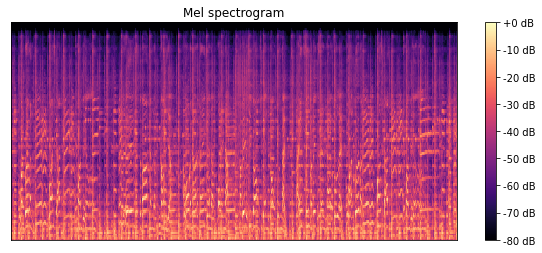

In [3]:
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(10, 4))
librosa.display.specshow(spect)
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.show()

# Using feature dataset in LSTM model

In [4]:
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation, BatchNormalization,SpatialDropout1D,Bidirectional, Embedding, LSTM
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [5]:
dataset = pd.read_csv("./Data/features_30_sec.csv")
dataset.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


In [6]:
dataset.shape

(1000, 60)

In [7]:
dataset = dataset.drop(labels='filename',axis=1)

In [42]:
fit = StandardScaler()
X = fit.fit_transform(np.array(dataset.iloc[:,:-1],dtype=float))

In [43]:
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [50]:
input_shape = (X_train.shape[0],X_train.shape[1])

# Using different preprocessing 

In [79]:
# dataset = pd.read_csv("./Data/features_3_sec.csv")
# dataset.head()
dataset = pd.read_csv('./Data/features_30_sec.csv')
dataset.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


In [76]:
#preprocessing with indexing
dataset = dataset.sample(frac=1).reset_index(drop=True)
dataset['Index'] = dataset.index
dataset['Index'], dataset['filename'] = dataset['filename'], dataset['Index']
dataset = dataset.drop(labels='Index',axis=1)
dataset.rename(columns={'filename': 'Index'}, inplace=True)
dataset.head()

,Index,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,0,661794,0.418885,0.076708,0.166096,0.001210,2312.160285,1.586990e+05,2061.011695,70045.051396,...,35.512867,-8.199739,35.780704,3.697105,35.008724,-3.673303,41.713371,-0.159386,43.971111,rock
1,1,661794,0.487689,0.085418,0.072866,0.001759,1640.702891,7.940821e+05,1907.194610,220640.503415,...,40.268814,-4.196731,39.033272,1.403948,43.582146,-0.262044,46.806602,-1.598751,47.831993,reggae
2,2,661504,0.346484,0.099935,0.169236,0.012325,3647.752646,1.088201e+06,2886.937475,188200.085508,...,189.397278,9.378994,215.382690,5.290071,243.643799,-2.933682,166.254929,-5.574459,104.694336,pop
3,3,661794,0.294207,0.082543,0.135758,0.001670,2294.785907,3.944233e+05,2207.011478,120192.078739,...,45.104656,-7.339207,78.827194,7.090200,62.938061,0.590611,61.029533,2.502075,71.135010,rock
4,4,661794,0.583706,0.071482,0.108040,0.002738,2473.157340,5.107040e+05,2499.721421,61619.807243,...,28.567949,-4.177921,37.613319,5.869064,25.845865,-1.516297,54.135696,1.285477,32.928226,hiphop


In [80]:
#preprocessing just dropping unnecessary columns
dataset = dataset.drop(labels='filename',axis=1)
dataset = dataset.sample(frac=1).reset_index(drop=True)
dataset.head()

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,661504,0.473502,0.080579,0.254404,0.004969,2702.893002,1.133988e+06,2725.880646,228772.270841,5775.478198,...,53.962646,1.069298,42.468853,1.906279,41.177200,2.270388,52.771935,2.421300,55.041618,pop
1,661794,0.316903,0.090039,0.104645,0.002312,2456.633122,4.565566e+05,2387.478925,153318.866933,4914.691318,...,91.181686,-0.969294,70.939491,-2.457310,88.149170,1.162093,98.833893,-1.842968,79.281334,country
2,661504,0.456015,0.091240,0.222857,0.008642,3145.644795,6.200499e+05,3017.327609,116790.520294,6691.954972,...,56.641434,0.644597,93.763290,1.258650,101.502197,2.072896,109.633003,3.032506,81.381851,pop
3,661504,0.316657,0.089779,0.126181,0.001279,1826.475341,3.399621e+05,2294.526354,208694.083357,3796.013937,...,75.963272,-1.803100,86.445694,-3.199966,112.056648,1.286021,96.692802,5.811747,79.258354,pop
4,661794,0.438275,0.081817,0.090498,0.001114,2683.280387,3.460418e+05,2126.811374,167687.179453,4972.387979,...,56.480621,-7.914579,95.724419,6.830009,51.329105,-5.659463,63.681808,1.342224,57.851303,metal


In [81]:
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size], dataset[train_size:len(dataset)]
print(len(train), len(test))

670 330


In [82]:
train_mapper = {'blues':0, 'classical':1, 'country':2, 'disco':3, 'hiphop':4, 'jazz':5, 'metal':6, 'pop':7, 'reggae':8, 'rock':9}
test_mapper = {'blues':0, 'classical':1, 'country':2, 'disco':3, 'hiphop':4, 'jazz':5, 'metal':6, 'pop':7, 'reggae':8, 'rock':9}

In [89]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler()
scaler.fit(train.iloc[:,:-1])
train_targets = train['label'].map(train_mapper).values
test_targets = test['label'].map(test_mapper).values
train = scaler.transform(train.iloc[:,:-1])
test = scaler.transform(test.iloc[:,:-1])
train.shape
print(train)


[[0.11348684 0.1786848  0.71384946 ... 0.16177361 0.63982453 0.11527124]
 [0.09488866 0.45879809 0.69419416 ... 0.18051112 0.44217519 0.08515578]
 [0.11348684 0.1098965  0.75663424 ... 0.35004376 0.35662705 0.1667071 ]
 ...
 [0.11348684 0.1449612  0.72934351 ... 0.15969673 0.30508983 0.12350803]
 [0.11348684 0.27749351 0.6636718  ... 0.12572804 0.55106021 0.12345722]
 [0.23658907 0.36092758 0.60444588 ... 0.20653142 0.74336517 0.13154923]]


In [84]:
train_targets

array([7, 2, 7, 7, 6, 1, 2, 6, 7, 6, 6, 8, 6, 4, 2, 8, 0, 8, 1, 2, 4, 1,
       0, 3, 4, 0, 2, 5, 2, 8, 1, 9, 1, 5, 5, 5, 7, 8, 0, 6, 9, 6, 7, 1,
       8, 4, 1, 3, 6, 6, 0, 0, 3, 3, 0, 0, 4, 7, 5, 4, 4, 8, 3, 7, 3, 7,
       0, 0, 9, 2, 2, 7, 2, 6, 6, 7, 3, 9, 4, 2, 9, 8, 9, 1, 0, 4, 8, 1,
       9, 4, 4, 3, 2, 1, 1, 6, 3, 4, 5, 5, 2, 8, 5, 1, 8, 6, 1, 8, 1, 7,
       7, 0, 6, 2, 4, 1, 5, 9, 5, 1, 3, 8, 2, 2, 0, 0, 8, 0, 5, 0, 7, 8,
       8, 0, 3, 9, 2, 4, 0, 2, 9, 8, 8, 9, 7, 4, 6, 9, 2, 8, 5, 7, 1, 8,
       2, 9, 1, 8, 8, 1, 1, 1, 4, 8, 5, 8, 6, 8, 1, 6, 2, 5, 3, 4, 6, 9,
       6, 4, 2, 3, 9, 8, 7, 7, 8, 5, 4, 8, 9, 4, 0, 8, 9, 3, 5, 2, 1, 4,
       8, 7, 9, 7, 0, 6, 5, 5, 1, 7, 7, 9, 9, 7, 9, 1, 4, 6, 2, 4, 3, 5,
       5, 6, 9, 2, 5, 8, 1, 0, 6, 0, 3, 1, 1, 8, 2, 5, 4, 9, 9, 6, 3, 2,
       7, 4, 9, 8, 0, 2, 1, 5, 9, 2, 0, 9, 4, 9, 7, 4, 4, 4, 6, 9, 3, 5,
       1, 6, 2, 0, 2, 9, 3, 7, 0, 5, 7, 5, 6, 0, 5, 4, 4, 4, 9, 5, 7, 8,
       3, 2, 2, 6, 0, 4, 4, 4, 8, 9, 0, 9, 3, 3, 3,

In [85]:
train.shape

(670, 58)

In [86]:
test.shape

(330, 58)

# Making own dataset from original soundfiles

In [112]:
dataset_path = './Data/genres_original'
jsonpath = 'data_json'
sample_rate = 22050
samples_per_track = sample_rate * 30
num_segment=10

In [135]:
import math
import json
import librosa
import os
def preprocess(dataset_path,json_path,num_mfcc=13,n_fft=2048,hop_length=512,num_segment=10):
    data = {"mapping": [], "labels": [], "mfcc": []}
    samples_per_segment = int(samples_per_track / num_segment)
    num_mfcc_vectors_per_segment = math.ceil(samples_per_segment / hop_length)

    for i, (dirpath,dirnames,filenames) in enumerate(os.walk(dataset_path)):

        if dirpath != dataset_path:

            #Adding all the labels
            label = str(dirpath).split('\\')[-1]
            data["mapping"].append(label)

            print("\nInside ",label)

            #Going through each song within a label
            for f in filenames:
                file_path = dataset_path +"/" + str(label) + "/" + str(f)
                y, sr = librosa.load(file_path, sr = sample_rate)

                #Taking the MFCC of the song
                for n in range(num_segment):
                    start = samples_per_segment * n
                    finish = start + samples_per_segment
                    mfcc = librosa.feature.mfcc(y[start:finish], sample_rate, n_mfcc = num_mfcc, n_fft = n_fft, hop_length = hop_length)
                    mfcc = mfcc.T
                    if len(mfcc) == num_mfcc_vectors_per_segment:
                        data["mfcc"].append(mfcc.tolist())
                        data["labels"].append(i-1)
                        print("Track Name ", file_path, n+1)

    with open(json_path, "w") as fp:
        json.dump(data, fp, indent = 4)


In [136]:
# mfcc = mfcc.T #259 x 13
preprocess(dataset_path,jsonpath,num_segment=10)


Inside  blues
Track Name  ./Data/genres_original/blues/blues.00000.wav 1
Track Name  ./Data/genres_original/blues/blues.00000.wav 2
Track Name  ./Data/genres_original/blues/blues.00000.wav 3
Track Name  ./Data/genres_original/blues/blues.00000.wav 4
Track Name  ./Data/genres_original/blues/blues.00000.wav 5
Track Name  ./Data/genres_original/blues/blues.00000.wav 6
Track Name  ./Data/genres_original/blues/blues.00000.wav 7
Track Name  ./Data/genres_original/blues/blues.00000.wav 8
Track Name  ./Data/genres_original/blues/blues.00000.wav 9
Track Name  ./Data/genres_original/blues/blues.00000.wav 10
Track Name  ./Data/genres_original/blues/blues.00001.wav 1
Track Name  ./Data/genres_original/blues/blues.00001.wav 2
Track Name  ./Data/genres_original/blues/blues.00001.wav 3
Track Name  ./Data/genres_original/blues/blues.00001.wav 4
Track Name  ./Data/genres_original/blues/blues.00001.wav 5
Track Name  ./Data/genres_original/blues/blues.00001.wav 6
Track Name  ./Data/genres_original/blues

In [144]:
print('Data loading\n')
with open('data_json', 'r') as fp:
    data = json.load(fp)
x = np.array(data['mfcc'])
y = np.array(data['labels'])
print('Loaded Data')

Data loading

Loaded Data


In [145]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25)
X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=0.2)

In [146]:
print(X_train.shape)

(7988, 130, 13)


In [149]:
model = Sequential()
model.add(LSTM(64,input_shape = input_shape, return_sequences = True))
model.add(LSTM(64))
model.add(Dense(64, activation='relu'))
model.add(Dense(10,activation = 'softmax'))
optimizer = tf.keras.optimizers.Adam(learning_rate=0.00001)
model.summary()
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

epochs = 50
batch_size = 50
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=epochs, batch_size=batch_size)

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_25 (LSTM)               (None, 130, 64)           19968     
_________________________________________________________________
lstm_26 (LSTM)               (None, 64)                33024     
_________________________________________________________________
dense_20 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_21 (Dense)             (None, 10)                650       
Total params: 57,802
Trainable params: 57,802
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
250/250 [==============================] - 8s 21ms/step - loss: 2.3133 - accuracy: 0.0959 - val_loss: 2.2886 - val_accuracy: 0.1161
Epoch 2/50
250/250 [==============================] - 4s 17ms/step - loss: 2.2761 - accuracy: 0.1193 - v

In [150]:
model.save('musicGenreRecognitionModel.h5')

In [151]:
song_path = 'C:/Users/piete/Downloads/around_the_world-atc.wav'
num_mfcc = 13
n_fft = 2048
hop_length = 512
sample_rate = 22050
samples_per_track = sample_rate * 30
num_segment = 10

In [155]:
model = tf.keras.models.load_model('musicGenreRecognitionModel.h5')
   
classes = ['Blues','Classical','Country','Disco','Hiphop', 'Jazz','Metal','Pop','Reggae','Rock']

class_predictions = []

samples_per_segment = int(samples_per_track / num_segment)
prediction_per_part = []

In [157]:
for n in range(num_segment):
            start = samples_per_segment * n
            finish = start + samples_per_segment
            mfcc = librosa.feature.mfcc(y[start:finish], sample_rate, n_mfcc = num_mfcc, n_fft = n_fft, hop_length = hop_length)
            mfcc = mfcc.T
            mfcc = mfcc.reshape(1, mfcc.shape[0], mfcc.shape[1])
         
            array = model.predict(mfcc)*100
            array = array.tolist()
#find maximum percentage class predicted
class_predictions.append(array[0].index(max(array[0])))
occurence_dict = {}
for i in class_predictions:
            if i not in occurence_dict:
                occurence_dict[i] = 1
            else:
                occurence_dict[i] +=1
max_key = max(occurence_dict, key=occurence_dict.get) 
prediction_per_part.append(classes[max_key])

prediction = max(set(prediction_per_part), key = prediction_per_part.count)
print(prediction)

Jazz


# Music genre recognition with CNN

In [40]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import scipy
import IPython.display as ipd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow import keras
import pickle 

In [52]:
dataset = pd.read_csv("./Data/features_3_sec.csv")
dataset.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


In [53]:
dataset = dataset.drop(labels='filename',axis=1)

In [54]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
class_list = dataset.iloc[:,-1] 
convert = LabelEncoder()

In [55]:
y = convert.fit_transform(class_list)
y.shape

(9990,)

In [56]:
from sklearn.preprocessing import StandardScaler
fit = StandardScaler()
X = fit.fit_transform(np.array(dataset.iloc[:,:-1],dtype=float))

In [57]:
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [58]:
X_train.shape

(7992, 58)

In [59]:
y_test.shape

(1998,)

In [49]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [19]:
model = Sequential()

model.add(Dense(512,input_shape=(X_train.shape[1],),activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(256,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(64,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(10,activation='softmax'))


model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               30208     
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8

In [20]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics='accuracy')

In [21]:
earlystop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=10,min_delta=0.0001)
modelcheck = ModelCheckpoint('best_model.hdf5',monitor='val_accuracy',verbose=1,save_best_only=True,mode='max')

In [22]:
history = model.fit(X_train,y_train, validation_data=(X_test,y_test), epochs=600, callbacks=[earlystop,modelcheck], batch_size=128)

Epoch 1/600
63/63 [==============================] - 11s 13ms/step - loss: 1.8909 - accuracy: 0.3191 - val_loss: 1.0833 - val_accuracy: 0.6151

Epoch 00001: val_accuracy improved from -inf to 0.61512, saving model to best_model.hdf5
Epoch 2/600
63/63 [==============================] - 0s 6ms/step - loss: 1.1449 - accuracy: 0.5966 - val_loss: 0.8362 - val_accuracy: 0.7187

Epoch 00002: val_accuracy improved from 0.61512 to 0.71872, saving model to best_model.hdf5
Epoch 3/600
63/63 [==============================] - 0s 6ms/step - loss: 0.9015 - accuracy: 0.6848 - val_loss: 0.7039 - val_accuracy: 0.7663

Epoch 00003: val_accuracy improved from 0.71872 to 0.76627, saving model to best_model.hdf5
Epoch 4/600
63/63 [==============================] - 0s 6ms/step - loss: 0.7668 - accuracy: 0.7371 - val_loss: 0.6568 - val_accuracy: 0.7708

Epoch 00004: val_accuracy improved from 0.76627 to 0.77077, saving model to best_model.hdf5
Epoch 5/600
63/63 [==============================] - 0s 6ms/step 

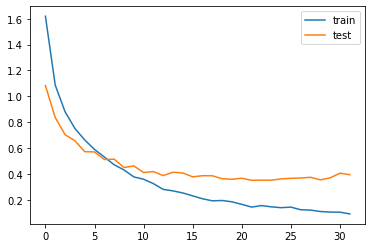

In [24]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'], label='train') 
plt.plot(history.history['val_loss'], label='test') 
plt.legend()
plt.show()

In [25]:
test_loss, test_accuracy = model.evaluate(X_test,y_test,batch_size=128)
print("Test loss : ",test_loss)
print("\nBest test accuracy : ",test_accuracy*100)

16/16 [==============================] - 0s 2ms/step - loss: 0.3940 - accuracy: 0.9009
Test loss :  0.39404943585395813

Best test accuracy :  90.09009003639221


# Using preprocessed data in lstm

In [43]:
train_X_preprocessed_data = "data_train_input.npy"
train_Y_preprocessed_data = "data_train_target.npy"
dev_X_preprocessed_data = "data_validation_input.npy"
dev_Y_preprocessed_data = "data_validation_target.npy"
test_X_preprocessed_data = "data_test_input.npy"
test_Y_preprocessed_data = "data_test_target.npy"

In [44]:
train_X = np.load(train_X_preprocessed_data)
train_Y = np.load(train_Y_preprocessed_data)

dev_X = np.load(dev_X_preprocessed_data)
dev_Y = np.load(dev_Y_preprocessed_data)

test_X = np.load(test_X_preprocessed_data)
test_Y = np.load(test_Y_preprocessed_data)


In [49]:
model = Sequential()
model.add(LSTM(units=128, dropout=0.05, recurrent_dropout=0.35, return_sequences=True, input_shape=[train_X.shape[1], train_X.shape[2]]))
model.add(LSTM(units=32,  dropout=0.05, recurrent_dropout=0.35, return_sequences=False))
model.add(Dense(units=train_Y.shape[1], activation="softmax"))
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

epochs = 20
batch_size = 35
model.summary()
history = model.fit(train_X, train_Y, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=1)


Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_14 (LSTM)               (None, 128, 128)          82944     
_________________________________________________________________
lstm_15 (LSTM)               (None, 32)                20608     
_________________________________________________________________
dense_7 (Dense)              (None, 8)                 264       
Total params: 103,816
Trainable params: 103,816
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
10/10 [==============================] - 28s 2s/step - loss: 1.9544 - accuracy: 0.2708 - val_loss: 1.8172 - val_accuracy: 0.1905
Epoch 2/20
10/10 [==============================] - 23s 2s/step - loss: 1.6755 - accuracy: 0.3988 - val_loss: 1.6636 - val_accuracy: 0.2500
Epoch 3/20
10/10 [==============================] - 22s 2s/step - loss: 1.5109 - accuracy: 0.3958 

# Music genre recognition with lyrics

In [1]:
from collections import Counter
import os
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import normalize
from sklearn.metrics import accuracy_score
import pickle
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation, BatchNormalization,SpatialDropout1D,Bidirectional, Embedding, LSTM
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer, text_to_word_sequence
from spacy.lang.en import English

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
artist_database = pd.read_csv('artists-data.csv')
artist_database = artist_database.drop_duplicates(subset = 'Link', keep ='first')
artist_database.head()

,Artist,Songs,Popularity,Link,Genre,Genres
0,10000 Maniacs,110,0.3,/10000-maniacs/,Rock,Rock; Pop; Electronica; Dance; J-Pop/J-Rock; G...
1,12 Stones,75,0.3,/12-stones/,Rock,Rock; Gospel/Religioso; Hard Rock; Grunge; Roc...
2,311,196,0.5,/311/,Rock,Rock; Surf Music; Reggae; Ska; Pop/Rock; Rock ...
3,4 Non Blondes,15,7.5,/4-non-blondes/,Rock,Rock; Pop/Rock; Rock Alternativo; Grunge; Blue...
4,A Cruz Está Vazia,13,0.0,/a-cruz-esta-vazia/,Rock,Rock


In [4]:
lyrics_database = pd.read_csv('lyrics-data.csv')
lyrics_database.rename(columns={'ALink':'Link'}, inplace=True)
lyrics_database.head()

,Link,SName,SLink,Lyric,Idiom
0,/10000-maniacs/,More Than This,/10000-maniacs/more-than-this.html,I could feel at the time. There was no way of ...,ENGLISH
1,/10000-maniacs/,Because The Night,/10000-maniacs/because-the-night.html,"Take me now, baby, here as I am. Hold me close...",ENGLISH
2,/10000-maniacs/,These Are Days,/10000-maniacs/these-are-days.html,These are. These are days you'll remember. Nev...,ENGLISH
3,/10000-maniacs/,A Campfire Song,/10000-maniacs/a-campfire-song.html,"A lie to say, ""O my mountain has coal veins an...",ENGLISH
4,/10000-maniacs/,Everyday Is Like Sunday,/10000-maniacs/everyday-is-like-sunday.html,Trudging slowly over wet sand. Back to the ben...,ENGLISH


In [21]:
artistLyrics_database = pd.merge(lyrics_database,artist_database, on='Link')
artistLyrics_database.head()

,Link,SName,SLink,Lyric,Idiom,Artist,Songs,Popularity,Genre,Genres
0,/10000-maniacs/,More Than This,/10000-maniacs/more-than-this.html,I could feel at the time. There was no way of ...,ENGLISH,10000 Maniacs,110,0.3,Rock,Rock; Pop; Electronica; Dance; J-Pop/J-Rock; G...
1,/10000-maniacs/,Because The Night,/10000-maniacs/because-the-night.html,"Take me now, baby, here as I am. Hold me close...",ENGLISH,10000 Maniacs,110,0.3,Rock,Rock; Pop; Electronica; Dance; J-Pop/J-Rock; G...
2,/10000-maniacs/,These Are Days,/10000-maniacs/these-are-days.html,These are. These are days you'll remember. Nev...,ENGLISH,10000 Maniacs,110,0.3,Rock,Rock; Pop; Electronica; Dance; J-Pop/J-Rock; G...
3,/10000-maniacs/,A Campfire Song,/10000-maniacs/a-campfire-song.html,"A lie to say, ""O my mountain has coal veins an...",ENGLISH,10000 Maniacs,110,0.3,Rock,Rock; Pop; Electronica; Dance; J-Pop/J-Rock; G...
4,/10000-maniacs/,Everyday Is Like Sunday,/10000-maniacs/everyday-is-like-sunday.html,Trudging slowly over wet sand. Back to the ben...,ENGLISH,10000 Maniacs,110,0.3,Rock,Rock; Pop; Electronica; Dance; J-Pop/J-Rock; G...


In [22]:
specific_columns = artistLyrics_database[['Artist', 'SName', 'Genre','Lyric', 'Popularity','Idiom']]
dataset = specific_columns[specific_columns.Lyric.notnull()]
artists = dataset['Artist'].unique()
genres = dataset['Genre'].unique()
dataset.head()

,Artist,SName,Genre,Lyric,Popularity,Idiom
0,10000 Maniacs,More Than This,Rock,I could feel at the time. There was no way of ...,0.3,ENGLISH
1,10000 Maniacs,Because The Night,Rock,"Take me now, baby, here as I am. Hold me close...",0.3,ENGLISH
2,10000 Maniacs,These Are Days,Rock,These are. These are days you'll remember. Nev...,0.3,ENGLISH
3,10000 Maniacs,A Campfire Song,Rock,"A lie to say, ""O my mountain has coal veins an...",0.3,ENGLISH
4,10000 Maniacs,Everyday Is Like Sunday,Rock,Trudging slowly over wet sand. Back to the ben...,0.3,ENGLISH


In [23]:
dataset = dataset[dataset['Genre'] == 'Rock']
dataset.sample(3)
dataset = dataset.drop(columns=['Idiom','Popularity','Lyric'])
dataset.head()

,Artist,SName,Genre
0,10000 Maniacs,More Than This,Rock
1,10000 Maniacs,Because The Night,Rock
2,10000 Maniacs,These Are Days,Rock
3,10000 Maniacs,A Campfire Song,Rock
4,10000 Maniacs,Everyday Is Like Sunday,Rock


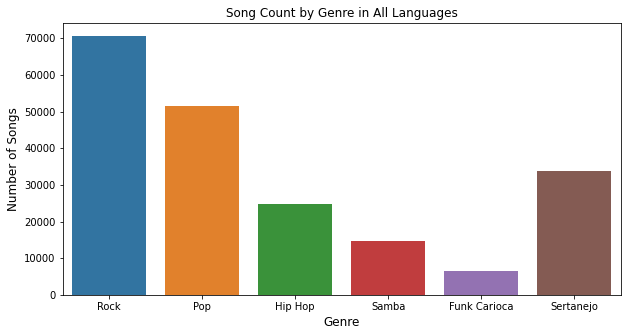

In [41]:
plt.figure(figsize=(10,5))

sns.countplot(x='Genre', data=dataset)

plt.title('Song Count by Genre in All Languages')
plt.ylabel('Number of Songs', fontsize=12)
plt.xlabel('Genre', fontsize=12)
plt.show()

In [21]:
english_database = dataset[dataset['Idiom'] == 'ENGLISH']

In [42]:
# run this only if you want database for 4 genres
english_database = dataset

In [43]:
english_database.tail()

,Artist,SName,Genre,Lyric,Popularity,Idiom
202091,Zeca Pagodinho,Vou Botar Teu Nome Na Macumba,Samba,Eu vou botar teu nome na macumba. Vou procurar...,13.2,PORTUGUESE
202092,Zeca Pagodinho,Vou Procurar Esquecer,Samba,Vou procurar um novo amor na minha vida. Porqu...,13.2,PORTUGUESE
202093,Zeca Pagodinho,Vou Ver Juliana,Samba,Quando a mare vazá. Vou vê juliana. Vou vê jul...,13.2,PORTUGUESE
202094,Zeca Pagodinho,Yaô Cadê A Samba / Outro Recado / Hino,Samba,"Ô Yaô. Yaô, cadê a samba?. Está mangando na cu...",13.2,PORTUGUESE
202095,Zeca Pagodinho,"Zeca, Cadê Você?",Samba,"Ô, Zeca, tu tá morando onde?. Ô, Zeca, tu tá m...",13.2,PORTUGUESE


In [44]:
english_database = english_database.drop(columns=['Idiom', 'SName','Popularity','Artist'])
english_database.head()

,Genre,Lyric
0,Rock,I could feel at the time. There was no way of ...
1,Rock,"Take me now, baby, here as I am. Hold me close..."
2,Rock,These are. These are days you'll remember. Nev...
3,Rock,"A lie to say, ""O my mountain has coal veins an..."
4,Rock,Trudging slowly over wet sand. Back to the ben...


In [45]:
# map the genres in the english_database to integers
# english_database['Genre'] = english_database['Genre'].map(genre_mapper)
english_database['Genre'].replace({'Hip Hop':0,'Pop':1,'Rock':2, 'Sertanejo':3},inplace=True)
english_database.tail()

,Genre,Lyric
202091,Samba,Eu vou botar teu nome na macumba. Vou procurar...
202092,Samba,Vou procurar um novo amor na minha vida. Porqu...
202093,Samba,Quando a mare vazá. Vou vê juliana. Vou vê jul...
202094,Samba,"Ô Yaô. Yaô, cadê a samba?. Está mangando na cu..."
202095,Samba,"Ô, Zeca, tu tá morando onde?. Ô, Zeca, tu tá m..."


In [46]:
english_database = english_database[english_database.Genre != 'Samba']
english_database = english_database[english_database.Genre != 'Funk Carioca']
# english_database = english_database[english_database.Genre != 'Sertanejo']
english_database.tail()

,Genre,Lyric
181981,3,Num ranchinho beira córrego lá no fundo do gro...
181982,3,"Meus velhos amigos, companheiros aqui da serra..."
181983,3,Toada. Emaranhado entre meio a multidão. Quase...
181984,3,Canção Rancheira. O triste fracasso de um sonh...
181985,3,VOLTA AO PASSADO. Zilo e Zalo. . Ah se eu pude...


In [47]:
print('max',len(english_database.Lyric.max()))
print('min',len(english_database.Lyric.min()))

max 3207
min 5081


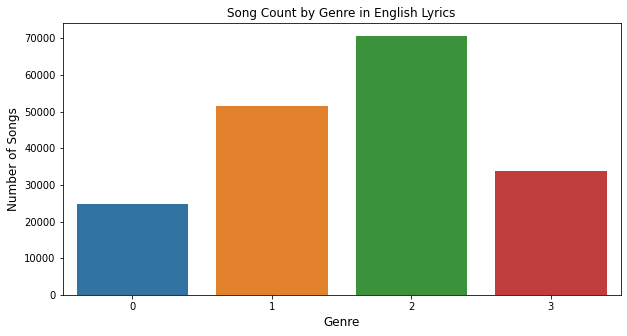

In [48]:
plt.figure(figsize=(10,5))
sns.countplot(x='Genre', data=english_database)
plt.title('Song Count by Genre in English Lyrics')
plt.ylabel('Number of Songs', fontsize=12)
plt.xlabel('Genre', fontsize=12)
plt.show()

In [49]:
# Splitting into features and targets
X = english_database['Lyric'].values
y = english_database['Genre'].values
y = to_categorical(y)

In [50]:
tokenizer = Tokenizer(num_words= None)
tokenizer.fit_on_texts(X)
sequences = tokenizer.texts_to_sequences(X)

# Example
print(X[0])
print(sequences[0])

I could feel at the time. There was no way of knowing. Fallen leaves in the night. Who can say where they're blowing. As free as the wind. Hopefully learning. Why the sea on the tide. Has no way of turning. More than this. You know there's nothing. More than this. Tell me one thing. More than this. You know there's nothing. It was fun for a while. There was no way of knowing. Like a dream in the night. Who can say where we're going. No care in the world. Maybe I'm learning. Why the sea on the tide. Has no way of turning. More than this. You know there's nothing. More than this. Tell me one thing. More than this. You know there's nothing. More than this. You know there's nothing. More than this. Tell me one thing. More than this. There's nothing.
[3, 115, 98, 88, 2, 65, 112, 69, 20, 85, 21, 1705, 2172, 1855, 11, 2, 118, 143, 49, 76, 124, 561, 2205, 70, 313, 70, 2, 748, 10953, 3633, 136, 2, 873, 15, 2, 3083, 341, 20, 85, 21, 1190, 114, 229, 40, 1, 32, 161, 193, 114, 229, 40, 109, 5, 61, 

In [51]:
X_encoded = pad_sequences(sequences, maxlen=100, padding='post')

print(X_encoded[0])

[  32  161  193  114  229   40  109    5   61  232  114  229   40    1
   32  161  193    8   69  659   28    4  340  112   69   20   85   21
 1705   30    4  362   11    2  118  143   49   76  124  173  246   20
  330   11    2  137  367   13 3633  136    2  873   15    2 3083  341
   20   85   21 1190  114  229   40    1   32  161  193  114  229   40
  109    5   61  232  114  229   40    1   32  161  193  114  229   40
    1   32  161  193  114  229   40  109    5   61  232  114  229   40
  161  193]


In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=3000, random_state=0,stratify = y)

In [26]:
vocabulary_size = X_train.max()

model = Sequential()
model.add(Embedding(vocabulary_size+1, 150, input_length=100))
model.add(SpatialDropout1D(0.3))
model.add(LSTM(100, dropout=0.1, recurrent_dropout=0.1))
model.add(Dense(500, activation='relu'))
model.add(Dense(3, activation='sigmoid'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=20,verbose=1,batch_size=64, validation_split=0.2)

Epoch 1/5
1331/1331 [==============================] - 3015s 2s/step - loss: 0.7778 - accuracy: 0.6456 - val_loss: 0.7192 - val_accuracy: 0.6831
Epoch 2/5
1331/1331 [==============================] - 1869s 1s/step - loss: 0.6302 - accuracy: 0.7288 - val_loss: 0.6712 - val_accuracy: 0.7052
Epoch 3/5
1331/1331 [==============================] - 1491s 1s/step - loss: 0.5283 - accuracy: 0.7738 - val_loss: 0.6958 - val_accuracy: 0.7112
Epoch 4/5
1331/1331 [==============================] - 1682s 1s/step - loss: 0.4437 - accuracy: 0.8131 - val_loss: 0.7007 - val_accuracy: 0.7256
Epoch 5/5
1331/1331 [==============================] - 1728s 1s/step - loss: 0.3786 - accuracy: 0.8420 - val_loss: 0.7116 - val_accuracy: 0.7250


In [28]:
vocabulary_size = X_train.max()

model = Sequential()
model.add(Embedding(vocabulary_size+1, 150, input_length=100))
model.add(SpatialDropout1D(0.3))
model.add(LSTM(100, dropout=0.1, recurrent_dropout=0.1))
model.add(Dense(500, activation='relu'))
model.add(Dense(3, activation='sigmoid'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=20,verbose=1,batch_size=64, validation_split=0.2)

Epoch 1/20
1331/1331 [==============================] - 2030s 2s/step - loss: 0.7839 - accuracy: 0.6425 - val_loss: 0.7212 - val_accuracy: 0.6819
Epoch 2/20
1331/1331 [==============================] - 1667s 1s/step - loss: 0.6399 - accuracy: 0.7223 - val_loss: 0.6823 - val_accuracy: 0.7007
Epoch 3/20
1331/1331 [==============================] - 1357s 1s/step - loss: 0.5337 - accuracy: 0.7735 - val_loss: 0.6968 - val_accuracy: 0.6742
Epoch 4/20
1331/1331 [==============================] - 1309s 983ms/step - loss: 0.4524 - accuracy: 0.8100 - val_loss: 0.6934 - val_accuracy: 0.7303
Epoch 5/20
1331/1331 [==============================] - 1302s 978ms/step - loss: 0.3841 - accuracy: 0.8389 - val_loss: 0.7035 - val_accuracy: 0.7291
Epoch 6/20
1331/1331 [==============================] - 1298s 975ms/step - loss: 0.3250 - accuracy: 0.8648 - val_loss: 0.7350 - val_accuracy: 0.7350
Epoch 7/20
1331/1331 [==============================] - 1304s 980ms/step - loss: 0.2783 - accuracy: 0.8849 - val_lo

In [29]:
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report
y_pred = np.argmax(model.predict(X_test), axis=-1)
y_true = np.argmax(y_test, axis=-1)
print(classification_report(y_true, y_pred))
print(accuracy_score(y_true, y_pred) * 100) 
print(confusion_matrix(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.81      0.82       513
           1       0.65      0.70      0.68       958
           2       0.80      0.78      0.79      1529

    accuracy                           0.76      3000
   macro avg       0.77      0.76      0.76      3000
weighted avg       0.76      0.76      0.76      3000

75.8
[[ 415   55   43]
 [  40  669  249]
 [  40  299 1190]]


In [ ]:
model.save('lyricsrecognitionmodel.h5')


In [34]:
vocabulary_size = X_train.max()

model = Sequential()
model.add(Embedding(vocabulary_size+1, 150, input_length=100))
model.add(SpatialDropout1D(0.3))
model.add(LSTM(128, dropout=0.1, recurrent_dropout=0.1))
model.add(Dense(128, activation='relu'))
model.add(Dense(4, activation='sigmoid'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=5,verbose=1,batch_size=64, validation_split=0.2)

Epoch 1/5
1332/1332 [==============================] - 1191s 892ms/step - loss: 0.8040 - accuracy: 0.6359 - val_loss: 0.7555 - val_accuracy: 0.6668
Epoch 2/5
1332/1332 [==============================] - 1189s 893ms/step - loss: 0.6477 - accuracy: 0.7219 - val_loss: 0.7333 - val_accuracy: 0.7000
Epoch 3/5
1332/1332 [==============================] - 1230s 923ms/step - loss: 0.5423 - accuracy: 0.7701 - val_loss: 0.6826 - val_accuracy: 0.7108
Epoch 4/5
1332/1332 [==============================] - 1191s 894ms/step - loss: 0.4570 - accuracy: 0.8082 - val_loss: 0.6955 - val_accuracy: 0.7180
Epoch 5/5
1332/1332 [==============================] - 1262s 948ms/step - loss: 0.3886 - accuracy: 0.8394 - val_loss: 0.7268 - val_accuracy: 0.7361


In [35]:
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report
y_pred = np.argmax(model.predict(X_test), axis=-1)
y_true = np.argmax(y_test, axis=-1)
print(classification_report(y_true, y_pred))
print(accuracy_score(y_true, y_pred) * 100) 
print(confusion_matrix(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.76      0.79       513
           1       0.66      0.60      0.63       957
           2       0.77      0.84      0.80      1528
           3       0.00      0.00      0.00         2

    accuracy                           0.75      3000
   macro avg       0.56      0.55      0.56      3000
weighted avg       0.74      0.75      0.74      3000

74.66666666666667
[[ 389   81   43    0]
 [  45  575  337    0]
 [  33  219 1276    0]
 [   0    0    2    0]]


C:\Users\piete\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\piete\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\piete\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [36]:
model.save('lyricsrecognitionmodel4genres.h5')

In [56]:
vocabulary_size = X_train.max()

model = Sequential()
model.add(Embedding(vocabulary_size+1, 150, input_length=100))
model.add(SpatialDropout1D(0.3))
model.add(LSTM(128, dropout=0.1, recurrent_dropout=0.1))
model.add(Dense(64, activation='relu'))
model.add(Dense(4, activation='sigmoid'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=5,verbose=1,batch_size=256, validation_split=0.2)

Epoch 1/5
556/556 [==============================] - 619s 1s/step - loss: 0.8443 - accuracy: 0.6324 - val_loss: 0.7314 - val_accuracy: 0.6958
Epoch 2/5
556/556 [==============================] - 603s 1s/step - loss: 0.6359 - accuracy: 0.7392 - val_loss: 0.6731 - val_accuracy: 0.7217
Epoch 3/5
556/556 [==============================] - 600s 1s/step - loss: 0.5155 - accuracy: 0.7931 - val_loss: 0.7077 - val_accuracy: 0.7433
Epoch 4/5
556/556 [==============================] - 608s 1s/step - loss: 0.4284 - accuracy: 0.8297 - val_loss: 0.6773 - val_accuracy: 0.7324
Epoch 5/5
556/556 [==============================] - 611s 1s/step - loss: 0.3617 - accuracy: 0.8565 - val_loss: 0.7173 - val_accuracy: 0.7461


In [57]:
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report
y_pred = np.argmax(model.predict(X_test), axis=-1)
y_true = np.argmax(y_test, axis=-1)
print(classification_report(y_true, y_pred))
print(accuracy_score(y_true, y_pred) * 100) 
print(confusion_matrix(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.77      0.77       410
           1       0.63      0.66      0.65       856
           2       0.78      0.73      0.75      1173
           3       0.86      0.91      0.88       561

    accuracy                           0.75      3000
   macro avg       0.76      0.77      0.76      3000
weighted avg       0.75      0.75      0.75      3000

74.86666666666667
[[315  46  36  13]
 [ 47 569 193  47]
 [ 37 258 852  26]
 [  4  31  16 510]]


In [58]:
model.save('lyrics4genresAllLanguages.h5')

In [29]:
import tensorflow as tf
model = tf.keras.models.load_model('lyrics4genresAllLanguages.h5')

In [38]:
lyrics = "Why you callin' at 11:30\
When you only wanna do me dirty? (Uh-uh, uh-uh)\
But I hit right back\
'Cause you got that-that, yeah\
Why you always wanna act like lovers?\
But you never wanna be each others' (Uh-uh, uh-uh)\
I say don't look back\
But I go right back, yeah\
All of a sudden, I'm hypnotized\
You're the one that I can't deny\
Every time that I say I'm gonna walk away\
You turn me on like a light switch\
When you're movin' your body around and around\
Now, I don't wanna fight this (No)\
You know how to just make me want\
You turn me on like a light switch\
When you're movin' your body around and around\
You got me in a tight grip (Yeah)\
You know how to just make me want you, baby\
Do you love it when you keep me guessin'? (Me guessin')\
When you're leaving then you leave me stressin' (Me stressin')\
(Uh-uh, uh-uh) (Uh-uh)\
But I can't stay mad when you walk like that, no\
Why you always wanna act like lovers?\
But you never wanna be each others' (Uh-uh, uh-uh) (Uh-uh)\
I say don't look back\
But I go right back, yeah\
All of a sudden, I'm hypnotized (Hypnotized)\
You're the one that I can't deny (Can't deny)\
Every time that I say I'm gonna walk away (Yeah)\
You turn me on like a light switch\
When you're movin' your body around and around\
Now, I don't wanna fight this (No)\
You know how to just make me want\
You turn me on like a light switch (Switch)\
When you're movin' your body around and around (Oh)\
You got me in a tight grip (Grip)\
You know how to just make me want you, baby\
Come on, come on, come on, come on, come on and show me how you do (You do)\
You want, you want, you want, you want, you wanna keep me wantin' you (You're wantin' me girl)\
Come on, come on, come on, come on, come on and (Hey) show me how you do (How you do)\
You want, you want, you want, you want (Yeah, yeah), you wanna keep me wantin' you\
You turn me on like a light switch\
When you're movin' your body around and around\
Now, I don't wanna fight this\
You know how to just make me want to, uhh\
You turn me on like a light switch\
When you're movin' your body around and around\
You got me in a tight grip\
You know how to just make me want you, baby\
Come on, come on, come on, come on, come on and (Oh) show me how you do (How you do)\
You want, you want, you want, you want (Wanna keep me wantin' you, baby), you wanna keep me wantin' you\
Come on, come on, come on, come on, come on and show me how you do (How you do)\
You want, you want, you want, you want, you wanna keep me wantin' you "

tokenizer = Tokenizer(num_words= None)
tokenizer.fit_on_texts(lyrics)
sequences = tokenizer.texts_to_sequences(lyrics)

# Example
print(lyrics[0])
print(sequences[0])

W
[9]


In [39]:
X_encoded = pad_sequences(sequences, maxlen=100, padding='post')

print(X_encoded[0])

[9 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [40]:
y_pred = np.argmax(model.predict(X_encoded), axis=-1)
print(y_pred)


[2 2 2 ... 2 2 2]


In [41]:
prediction_data = model.predict(X_encoded)
print(prediction_data)

[[0.38796553 0.6828469  0.8784856  0.05891577]
 [0.38864103 0.6824172  0.87839997 0.05885568]
 [0.38580948 0.685007   0.87863624 0.05908709]
 ...
 [0.38545576 0.68625623 0.8784471  0.05913742]
 [0.38550657 0.686073   0.8785469  0.05908528]
 [0.3856978  0.68465936 0.87893724 0.05896959]]


In [33]:
prediction_data = model.predict(X_encoded)
print(prediction_data)

[[0.38609233 0.6846862  0.87874085 0.05899142]
 [0.38580948 0.685007   0.87863624 0.05908709]
 [0.38749275 0.6828547  0.878696   0.05890043]
 [0.38749275 0.6828547  0.878696   0.05890043]
 [0.38864103 0.6824172  0.87839997 0.05885568]
 [0.3856978  0.6846593  0.87893724 0.05896959]
 [0.38545573 0.68625623 0.8784471  0.05913739]
 [0.38796553 0.6828469  0.8784856  0.05891577]
 [0.38609233 0.6846862  0.87874085 0.05899142]
 [0.3856978  0.6846593  0.87893724 0.05896959]
 [0.38476232 0.6860554  0.8786833  0.05918689]
 [0.38545573 0.68625623 0.8784471  0.05913739]
 [0.38360977 0.6867369  0.87916267 0.05908673]
 [0.3856978  0.6846593  0.87893724 0.05896959]
 [0.3855066  0.68607295 0.8785469  0.05908528]
 [0.38545573 0.68625623 0.8784471  0.05913739]
 [0.38360977 0.6867369  0.87916267 0.05908673]
 [0.3856978  0.6846593  0.87893724 0.05896959]
 [0.3878039  0.680334   0.8793422  0.05873045]
 [0.3855066  0.68607295 0.8785469  0.05908528]
 [0.38665476 0.68315226 0.87894124 0.05891722]
 [0.3878039  

In [24]:
# prediction_for_0 = []
# prediction_for_1 = []
# prediction_for_2 = []
# for i in prediction_data:
#     prediction_for_0.append(i[0])
#     prediction_for_1.append(i[1])
#     prediction_for_2.append(i[2])
# sum(prediction_for_0)
np.argmax(prediction_data.sum(axis=0))

2

In [15]:

artistLyrics_database[artistLyrics_database['Genre'] == 'Pop']['Lyric'].head()

1085    Hey, slow it down. What do you want from me. W...
1086    Died last night in my dreams. Walking the stre...
1087    I've paid my dues. Time after time. I've done ...
1088    So I got my boots on,. Got the right amount of...
1089    I wish that this night would never be over. Th...
Name: Lyric, dtype: object

In [1]:
artistLyrics_database.head()

NameError: name 'artistLyrics_database' is not defined